In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("hotel_bookings.csv")

df_cleaned = pd.read_excel("hotel_cleaned.xlsx")

In [4]:
df3 =df
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df = df.reindex(sorted(df.columns), axis=1)
df2 = df

## Pandas Profiling

import pandas_profiling

from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()
profile
profile.to_file("your_report.html")

In [7]:
all = [ 'hotel', 'is_canceled','is_repeated_guest', 
       'reservation_status', 'total_of_special_requests']

notsorted = ['arrival_date_year','arrival_date_month', 'arrival_date_week_number',
             'arrival_date_day_of_month']

grouped =['lead_time','previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'reservation_status', 'previous_cancellations' ]

# Categories under 5% threshold is grouped into "Other"

days_in_waiting_list


<Figure size 1600x1200 with 0 Axes>

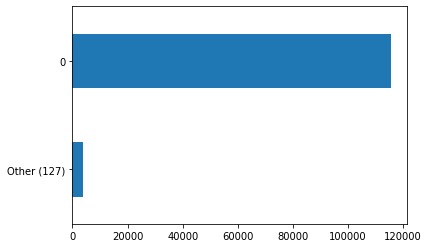

customer_type


<Figure size 1600x1200 with 0 Axes>

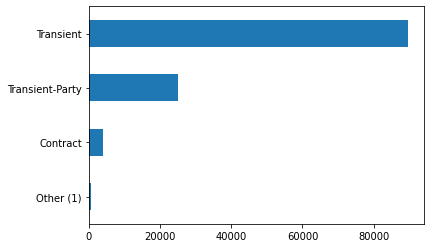

adr


<Figure size 1600x1200 with 0 Axes>

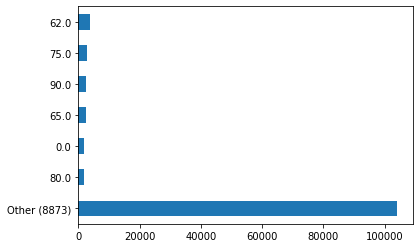

In [16]:
df = df3

for i in df.columns[25:28]:

    print(i)
    
    xx = df[i].value_counts().sort_values(ascending = False)
    xx = xx.to_frame().reset_index()
    xx.columns = [i, 'count']
    xx['percentage'] = (xx['count']/sum(xx['count']))*100 
    xx
    len(xx[xx.percentage >= 5.0])
    number= len(xx[xx.percentage >= 1.50]) 
    #print(sorted(df[i].unique()))
 
    if len(df[i].unique())> len(xx[xx.percentage >= 1.5]):
        plt.figure(figsize=(4, 3), dpi = 400)
        
        ### Creating top n
        chartz = df[i].value_counts().sort_values(ascending = False).head(number)
        
        #### Creating other variable 
        a = len(df[i].value_counts().sort_values(ascending = False)) - number
        b =df[i].value_counts().sort_values(ascending = False).tail(a)
        
        column_name = "Other ("+ str(len(b))+")"
        c = [column_name, b.sum()]
        z = pd.DataFrame([[column_name, b.sum()]], columns=[i, 'count'])
        
        #### fix first data frame, convert index to 
        chartz = chartz.reset_index()
        chartz.columns = [i, 'count']
        s = chartz.append(z)
        final = s.reset_index()[s.reset_index().columns[-2:]]
    
        
    else:
        plt.figure(figsize=(4, 3), dpi = 400)
        
        chartz = df[i].value_counts().sort_values(ascending = False)
        final = chartz.reset_index()
        final.columns = [i, 'count']

        
    #### charting     
    ax = final.plot(kind="barh")
    plt.gca().legend_.remove()
    ax.set_yticklabels(final[i])
    ax.invert_yaxis()
        
        #plt.xticks(fontsize=14)
        #plt.yticks(fontsize=14)
        
    plt.show()
    #filename = i+'.png'
    #plt.savefig(filename, bbox_inches='tight')

# All Categories are plotted

reserved_room_type
  reserved_room_type  count
0                  A  85994
1                  D  19201
2                  E   6535
3                  F   2897
4                  G   2094
5                  B   1118
6                  C    932
7                  H    601
8                  P     12
9                  L      6
assigned_room_type
   assigned_room_type  count
0                   A  74053
1                   D  25322
2                   E   7806
3                   F   3751
4                   G   2553
5                   C   2375
6                   B   2163
7                   H    712
8                   I    363
9                   K    279
10                  P     12
11                  L      1


<Figure size 1600x1200 with 0 Axes>

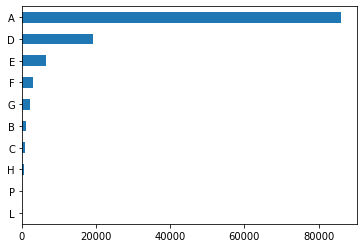

<Figure size 1600x1200 with 0 Axes>

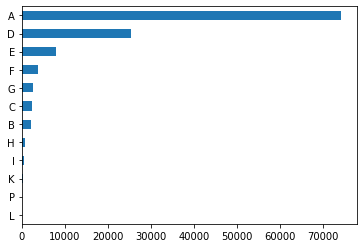

In [19]:
df = df3


for i in df.columns[19:21]:
    print(i)
    

    plt.figure(figsize=(4, 3), dpi = 400)
        
    chartz = df[i].value_counts()
    final = chartz.reset_index()
    final.columns = [i, 'count']
    final = final.reset_index(drop=True)[final.reset_index(drop=True).columns[-2:]]
    print(final)

    ''' 
    #### charting     
    ax = final['count'].plot(kind="barh",width=1.0)
    
    ax.set_yticklabels(final[i])
    #ax.set_xlim((final[i]), max(final[i]))
    #ax.invert_yaxis()
        
        #plt.xticks(fontsize=14)
        #plt.yticks(fontsize=14)

    filename = i+'.png'
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    '''   
    
    #### charting     
    ax = final.plot(kind="barh")
    plt.gca().legend_.remove()
    ax.set_yticklabels(final[i])
    ax.invert_yaxis()
        
        #plt.xticks(fontsize=14)
        #plt.yticks(fontsize=14)

    filename = i+'.png'
    plt.savefig(filename, bbox_inches='tight')





In [20]:
import ppscore as pps

In [22]:
a =pps.predictors(df, "is_canceled")

<AxesSubplot:xlabel='x', ylabel='ppscore'>

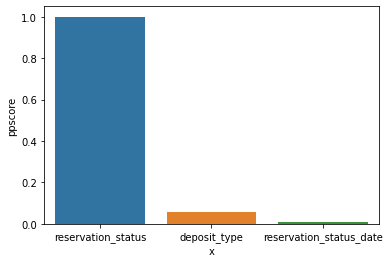

In [30]:
import seaborn as sns
#predictors_df = pps.predictors(df, "is_canceled")
sns.barplot(data=a[:3], x="x", y="ppscore")

In [28]:
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,reservation_status,is_canceled,1.000000,regression,True,mean absolute error,0.3642,0.000000,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1,deposit_type,is_canceled,0.046803,regression,True,mean absolute error,0.3686,0.351348,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,reservation_status_date,is_canceled,0.029102,regression,True,mean absolute error,0.3730,0.362145,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,hotel,is_canceled,0.000000,regression,True,mean absolute error,0.3636,0.453923,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,lead_time,is_canceled,0.000000,regression,True,mean absolute error,0.3602,0.393205,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
5,arrival_date_year,is_canceled,0.000000,regression,True,mean absolute error,0.3730,0.467184,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
6,arrival_date_month,is_canceled,0.000000,regression,True,mean absolute error,0.3782,0.468788,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
7,arrival_date_week_number,is_canceled,0.000000,regression,True,mean absolute error,0.3750,0.461453,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
8,arrival_date_day_of_month,is_canceled,0.000000,regression,True,mean absolute error,0.3798,0.470945,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
9,stays_in_weekend_nights,is_canceled,0.000000,regression,True,mean absolute error,0.3686,0.465039,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


In [31]:
import seaborn as sns

<AxesSubplot:>

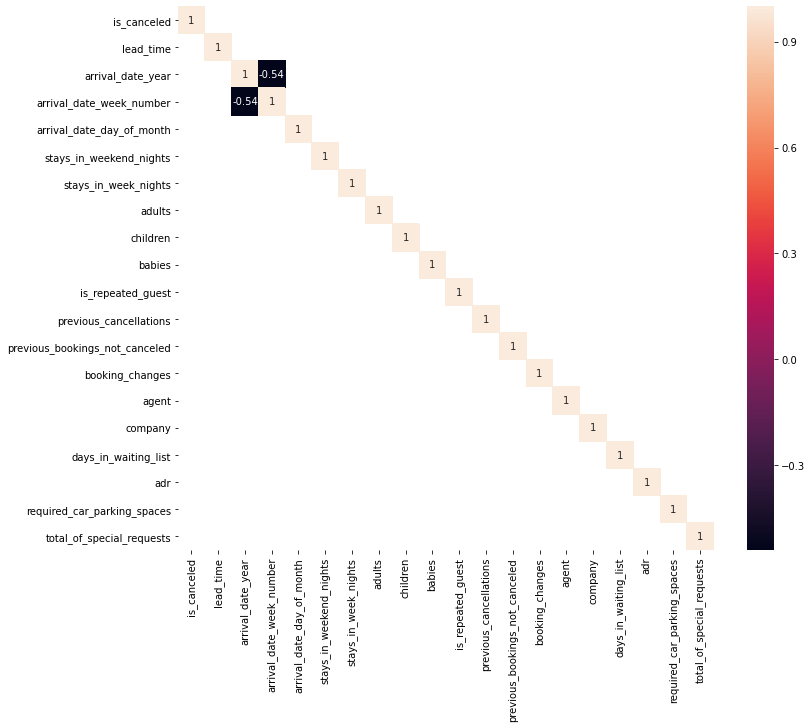

In [33]:
# calculate the correlation matrix, show only significant correlation
corr = df.corr()

plt.figure(figsize=(12,10))
# plot the heatmap
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
        xticklabels=corr.columns,
        yticklabels=corr.columns
           ,annot=True)

In [34]:
a[-20:]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
11,adults,is_canceled,0.0,regression,True,mean absolute error,0.3790,0.466422,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
12,children,is_canceled,0.0,regression,True,mean absolute error,0.3586,0.459369,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
13,babies,is_canceled,0.0,regression,True,mean absolute error,0.3638,0.462823,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
14,meal,is_canceled,0.0,regression,True,mean absolute error,0.3742,0.467140,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
15,country,is_canceled,0.0,regression,True,mean absolute error,0.3682,0.405439,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
16,market_segment,is_canceled,0.0,regression,True,mean absolute error,0.3826,0.445396,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
17,distribution_channel,is_canceled,0.0,regression,True,mean absolute error,0.3718,0.450067,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
18,is_repeated_guest,is_canceled,0.0,regression,True,mean absolute error,0.3758,0.465736,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
19,previous_cancellations,is_canceled,0.0,regression,True,mean absolute error,0.3726,0.432817,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
20,previous_bookings_not_canceled,is_canceled,0.0,regression,True,mean absolute error,0.3726,0.462050,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


In [35]:
corr.is_canceled.sort_values()[:20]

total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
booking_changes                  -0.144381
is_repeated_guest                -0.084793
agent                            -0.083114
previous_bookings_not_canceled   -0.057358
babies                           -0.032491
company                          -0.020642
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
children                          0.005048
arrival_date_week_number          0.008148
arrival_date_year                 0.016660
stays_in_week_nights              0.024765
adr                               0.047557
days_in_waiting_list              0.054186
adults                            0.060017
previous_cancellations            0.110133
lead_time                         0.293123
is_canceled                       1.000000
Name: is_canceled, dtype: float64

corr.to_excel('corr.xlsx')